In [39]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import plotly.offline as pyo
import matplotlib.pyplot as plt
import yfinance as yf

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [41]:
stocklist = ['RVNL.NS', 'IRCON.NS']
stocklist

['RVNL.NS', 'IRCON.NS']

In [43]:
df = yf.download(stocklist, start='2020-01-01', end='2025-12-31')
df.head()

[*********************100%***********************]  2 of 2 completed


Price           Close                  High                   Low             \
Ticker       IRCON.NS    RVNL.NS   IRCON.NS    RVNL.NS   IRCON.NS    RVNL.NS   
Date                                                                           
2020-01-01  32.853539  19.097368  33.148438  19.346464  32.275691  19.055853   
2020-01-02  34.104881  19.720110  34.591070  19.844658  32.917306  19.014337   
2020-01-03  33.857792  20.799524  34.423682  21.007104  33.475218  19.595561   
2020-01-06  32.873459  19.803141  33.873731  20.591944  32.757889  19.637076   
2020-01-07  33.232128  20.384367  33.626657  20.799527  32.678193  19.927691   

Price            Open              Volume            
Ticker       IRCON.NS    RVNL.NS IRCON.NS   RVNL.NS  
Date                                                 
2020-01-01  32.439083  19.138884   861770   3128543  
2020-01-02  32.917306  19.138885  2869740   7744461  
2020-01-03  34.192546  19.595561  1336790  17976269  
2020-01-06  33.873731  20.467396  1007270   7947042  
2020-01-07  33.626657  20.052239   438210   8533366

# Calculating Simple Return

In [46]:
simple_returns = df.Close.pct_change().dropna()
simple_returns*100

Ticker,IRCON.NS,RVNL.NS
Date,,
2020-01-02,3.808852,3.260877
2020-01-03,-0.724499,5.473673
2020-01-06,-2.907257,-4.790416
2020-01-07,1.091060,2.935021
2020-01-08,2.326415,2.647643
...,...,...
2025-12-24,0.826931,1.126227
2025-12-25,0.000000,0.000000
2025-12-26,4.692449,12.221579


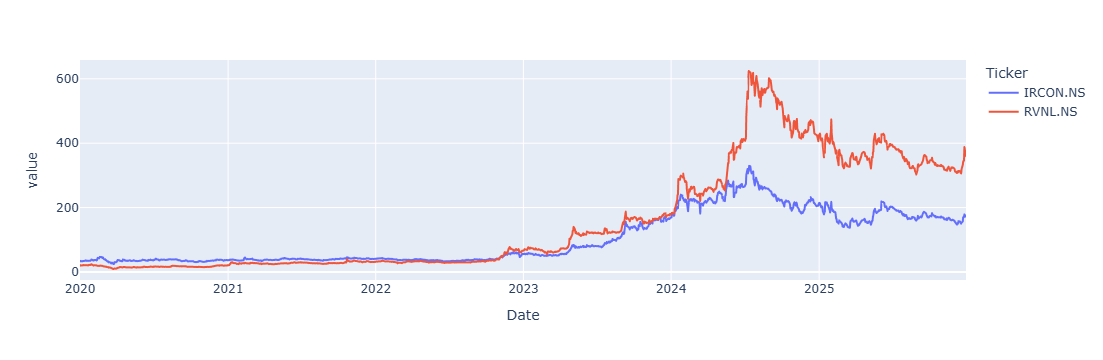

In [48]:
df.Close.plot()

In [50]:
# Here I'm writing a script to get the price of very first day and the price of last day of our defined range

print('First', df.Close.iloc[0], 'Last', df.Close.iloc[-1])

First Ticker
IRCON.NS    32.853539
RVNL.NS     19.097368
Name: 2020-01-01 00:00:00, dtype: float64 Last Ticker
IRCON.NS    171.490005
RVNL.NS     360.350006
Name: 2025-12-30 00:00:00, dtype: float64


# Calculating Log Normal Return

In [53]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns*100

Ticker,IRCON.NS,RVNL.NS
Date,,
2020-01-02,3.738106,3.208839
2020-01-03,-0.727136,5.329119
2020-01-06,-2.950355,-4.908957
2020-01-07,1.085151,2.892774
2020-01-08,2.299766,2.613200
...,...,...
2025-12-24,0.823530,1.119932
2025-12-25,0.000000,0.000000
2025-12-26,4.585681,11.530511


In [55]:
log_returns.mean()

Ticker
IRCON.NS    0.001111
RVNL.NS     0.001975
dtype: float64

In [57]:
df.Close.iloc[0] * np.exp(log_returns.mean() * len(log_returns))

Ticker
IRCON.NS    171.490005
RVNL.NS     360.350006
dtype: float64

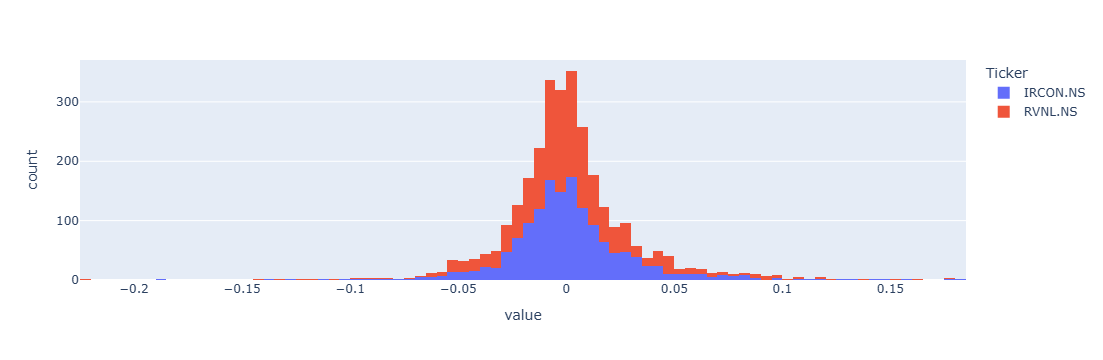

In [65]:
log_returns.plot(kind='hist')

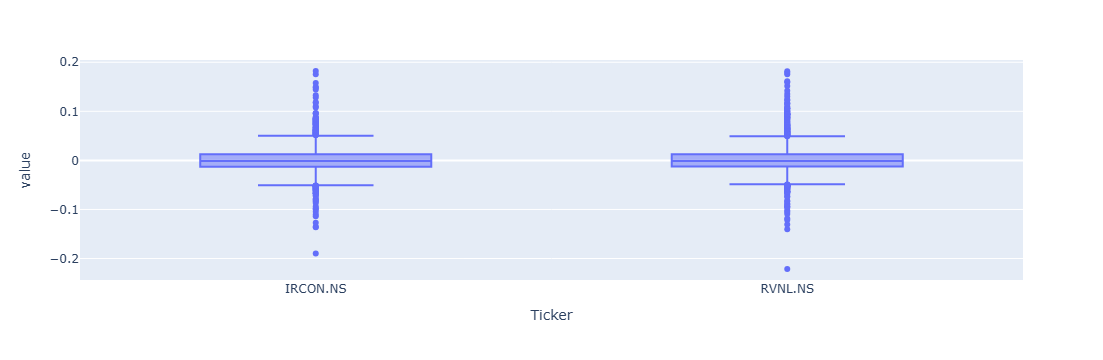

In [67]:
log_returns.plot(kind='box')